In [1]:
# Import pandas
import pandas as pd

In [2]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340


####  Exercise 1: Create a bar chart and a corresponding pivot table of the top 10 most expensive Neigborhoods
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood, then we take the top ten and weight each slice 
by the average value.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

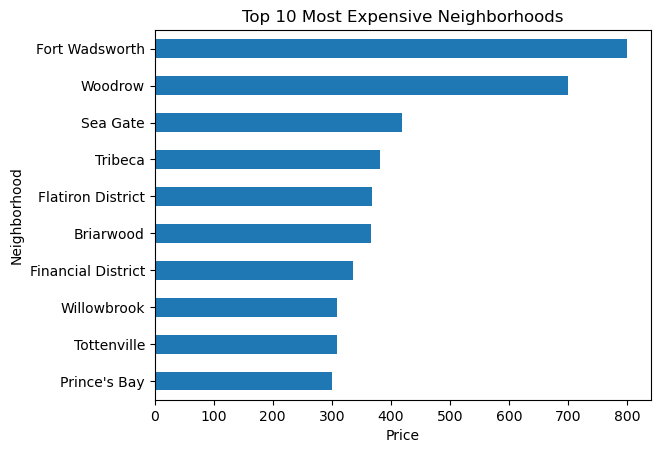

In [36]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.

df_avg_price = df.groupby('neighbourhood')['price'].mean()
df_sorted = df_avg_price.sort_values(ascending=False)

# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

top_10 = df_sorted.head(10)

top_10_plot = top_10.plot.barh(x='neighbourhood', y='price', legend=False)
top_10_plot.set_title('Top 10 Most Expensive Neighborhoods')
top_10_plot.set_xlabel('Price')
top_10_plot.set_ylabel('Neighborhood')

# make descending order
top_10_plot.invert_yaxis()

In [32]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price

pivot_top_10 = pd.pivot_table(top_10.reset_index(), index='neighbourhood', values='price')

pivot_top_10_sorted = pivot_top_10.sort_values(by='price', ascending=False)

pivot_top_10_sorted

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Sea Gate,418.230769
Tribeca,381.107143
Flatiron District,367.415584
Briarwood,366.162162
Financial District,335.385057
Tottenville,309.000000
Willowbrook,309.000000


####  Exercise 1: Now, create a bar chart and a corresponding pivot table of the top 10 LEAST expensive Neigborhoods
Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

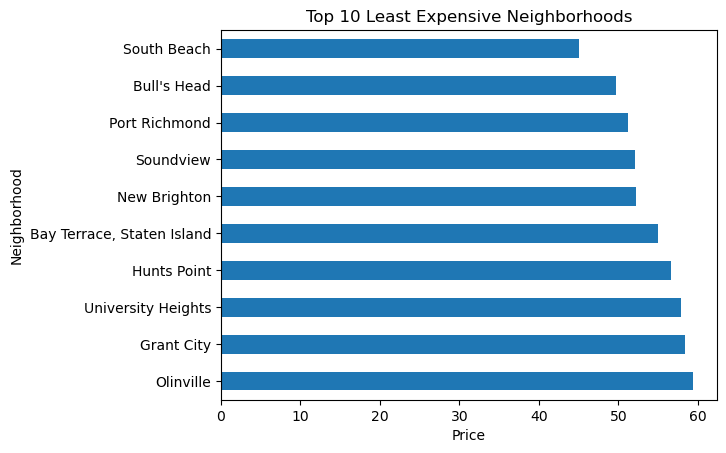

In [39]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.

df_avg_price = df.groupby('neighbourhood')['price'].mean()
df_sorted_ascending = df_avg_price.sort_values(ascending=True)

# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

top_10_ascending = df_sorted_ascending.head(10)

top_10_ascending_plot = top_10_ascending.plot.barh(x='neighbourhood', y='price', legend=False)
top_10_ascending_plot.set_title('Top 10 Least Expensive Neighborhoods')
top_10_ascending_plot.set_xlabel('Price')
top_10_ascending_plot.set_ylabel('Neighborhood')

# make ascending order
top_10_ascending_plot.invert_yaxis()

In [31]:
# we also would like to have the corresponding pivot table of the top 10

pivot_top_10_ascending = pd.pivot_table(top_10_ascending.reset_index(), index='neighbourhood', values='price')

pivot_top_10_ascending_sorted = pivot_top_10_ascending.sort_values(by='price', ascending=True)

pivot_top_10_ascending_sorted

,price
neighbourhood,
South Beach,45.000000
Bull's Head,49.666667
Port Richmond,51.222222
Soundview,52.055556
New Brighton,52.250000
"Bay Terrace, Staten Island",55.000000
Hunts Point,56.583333
University Heights,57.826087
Grant City,58.400000


In [ ]:
#  Now make all four widgets in a Tableau dashboard!